In [1]:
# import scripts.control_utils as cu
from importlib import reload
import matplotlib.pyplot as plt
from annotator.midas import MidasDetector
from annotator.canny import CannyDetector
from ldm.data.util import resize_image_pil
import torch
import torchvision.transforms as tt
import numpy as np

from PIL import Image
# reload(cu)
from safetensors.torch import save_file
import glob 

torch.cuda.set_device('cuda:4')



In [2]:
import scripts.control_utils as cu
import os

def load_model_from_dic (path_dic, Lora_kitti, Lora_cubes):

    config_path_depth = path_dic['yaml']
    model = cu.create_model(config_path_depth)

    print('MODEL LOADED ')
    print('')

    ckpt = torch.load(path_dic['ckpt'], map_location='cpu')
    model.load_state_dict(ckpt['state_dict'], strict=False)

    if Lora_kitti: 
        LORA_ckpt = torch.load('/export/data/vislearn/rother_subgroup/sd15_kitti.ckpt', map_location='cpu')
        model.load_state_dict(LORA_ckpt['state_dict'], strict=False)
    if Lora_cubes: 
        LORA_ckpt = torch.load('/export/data/vislearn/rother_subgroup/sd15_simplecubes.ckpt', map_location='cpu')
        model.load_state_dict(LORA_ckpt['state_dict'], strict=False)
    
    return model.to('cuda')

def get_paths (root, yaml_path, ckpt_path):
    path_dic = {}
    
    if root == False:
        path_dic['yaml'] = yaml_path
        path_dic['ckpt'] = ckpt_path
    else: 
        path_dic['yaml'] = os.path.join(root, yaml_path)
        path_dic['ckpt'] = os.path.join(root, ckpt_path)
    
    return path_dic

model_paths = {}
model_paths['CNXS_0.2'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/training_models/v15/2023-10-28T00-52-54_v15_03p_depth_add_bs24/',
                                    yaml_path = 'configs/2023-10-28T00-52-54-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/45000.ckpt'
                                    )
model_paths['CNXS_1.4'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/training_models/v15/2023-10-28T00-49-53_v15_03p_depth_cat_bs24/',
                                    yaml_path = 'configs/2023-10-28T00-49-53-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/45000.ckpt'
                                    )
model_paths['CNXS_20'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/midas/2023-10-31T11-53-42_cross_encD_cat_20p_depth_bs16/',
                                    yaml_path = 'configs/project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/45000.ckpt'
                                    )

model_paths['CNXS_20_edges'] = get_paths(root=False,
                                    yaml_path = '/export/home/ffeiden/Projects/ControlNet-XS/configs/inference/sd/20p_edges_project.yaml',
                                    ckpt_path = '/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/canny/canny/2023-11-02T22-23-27_v15_cross_encD_cat_20p_canny_bs16/checkpoints/trainstep_checkpoints/30000.ckpt'
                                    )

model_paths['CNXS_LR_20'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/low_res/2023-11-05T19-02-36_v15_cross_encD_cat_20p_depth_lowRes_bs16/',
                                    yaml_path = 'configs/2023-11-05T19-02-36-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/35000.ckpt'
                                    )
model_paths['CNXS_LR_100'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/low_res/2023-11-05T19-01-47_v15_cross_encD_cat_depth_100p_lowRes_bs16/',
                                    yaml_path = 'configs/2023-11-05T19-01-47-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/35000.ckpt'
                                    )
model_paths['CNXS_LR_02'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/low_res/2023-11-05T19-15-46_v15_cross_encD_add_02p_depth_lowRes_bs16/',
                                    yaml_path = 'configs/2023-11-05T19-15-46-project.yaml',
                                    ckpt_path = 'checkpoints/trainstep_checkpoints/35000.ckpt'
                                    )


/export/home/ffeiden/miniconda3/envs/.pt13/lib/python3.8/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


In [3]:
model = load_model_from_dic(model_paths['CNXS_20'], False, False)
cont = 'depth'

TwoStreamControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280,

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.2.self_attn.q_proj.bias', 'vision_model.encoder.layers.7.layer_norm1.bias', 'vision_model.encoder.layers.7.self_attn.v_proj.weight', 'vision_model.encoder.layers.9.self_attn.k_proj.bias', 'vision_model.encoder.layers.23.layer_norm2.weight', 'vision_model.encoder.layers.10.self_attn.k_proj.weight', 'vision_model.encoder.layers.16.mlp.fc1.weight', 'vision_model.encoder.layers.1.layer_norm1.bias', 'vision_model.encoder.layers.23.self_attn.k_proj.weight', 'vision_model.encoder.layers.5.layer_norm2.weight', 'vision_model.encoder.layers.13.layer_norm1.weight', 'vision_model.encoder.layers.22.self_attn.q_proj.weight', 'vision_model.encoder.layers.18.mlp.fc2.weight', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.encoder.layers.18.layer_norm2.bias', 'vision_model.encoder.layers.7.mlp.fc2.weight', 'vision_model.encoder.layers.19.self_at

Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is 768 and using 8 heads.
Setting up Me

/export/home/ffeiden/miniconda3/envs/.pt13/lib/python3.8/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


Loaded model config from [/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sd/v15/midas/2023-10-31T11-53-42_cross_encD_cat_20p_depth_bs16/configs/project.yaml]
MODEL LOADED 



In [4]:
size = 768
image_root = '/export/data/dzavadsk/tmp/visualSets/show_images/'#show_images selection
# image_root = '/export/data/ffeiden/PaperControlnetXS/Images_test/'
paths = [os.path.join(image_root, path) for path in os.listdir(image_root)]

image_path = paths[5]

canny_high_th = 120
canny_low_th = 100

image = cu.get_image(image_path, size=size)
edges = cu.get_canny_edges(image, low_th=canny_low_th, high_th=canny_high_th)
depth = cu.get_midas_depth(image, max_resolution=size)

if cont == 'depth':
    control = depth
elif cont == 'canny':
    control = edges
else: 
    control = None

it = 0

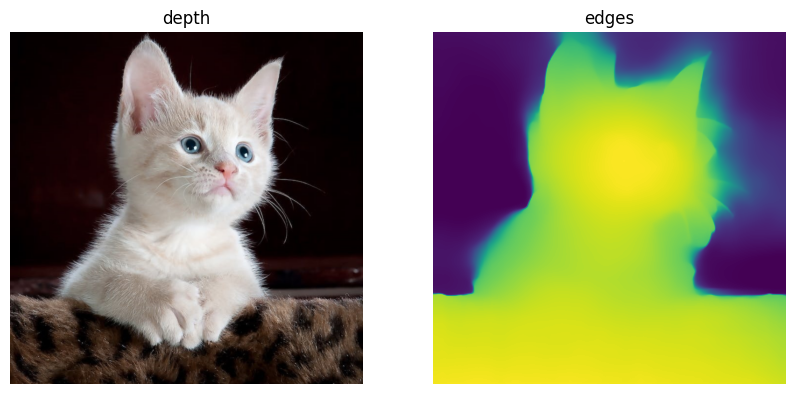

float64 0.0 1.0


In [5]:
plt.figure(figsize=(10, 10))


plt.subplot(121)
plt.title('depth')
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.title('edges')
plt.imshow(control)
plt.axis('off')
plt.show()

print(edges.dtype, np.min(edges), np.max(edges))


In [6]:
def sample_for_best (model, folder, root, prompts):
    
    os.mkdir(root+ folder)
    os.mkdir(root + folder + 'AA_grids')

    save = image
    if not save.mode == 'RGB':
        save = save.convert("RGB") 
    save.save(root+folder+'original.png')

    if cont == 'depth':
        save = Image.fromarray( (control).astype(np.uint8))
    elif cont == 'canny':
        save = Image.fromarray( (control * 255 ).astype(np.uint8))
    if not save.mode == 'RGB':
        save = save.convert("RGB") 
    save.save(root+folder+'control.png')

    strength = 0.95
    
    for (prompt_key, n_prompt) in prompts: #  'insuf_Prompt', 'conflicting_Prompt', 'Prompt'
        for run in range(5): #   1996, 1998, 2024
            seed = np.random.randint(4_000)

            sampe_name = prompt_key

            samples, controls = cu.get_sd_sample(
                guidance=control,
                ddim_steps=50,
                num_samples=12, 
                model=model,
                shape=[4, size // 8, size // 8],
                control_scale=strength, 
                prompt=prompt_key,
                seed=seed,
                n_prompt=n_prompt,
            )

            to_save = Image.fromarray(cu.create_image_grid(samples))
            to_save.save(root+folder+'AA_grids/'+sampe_name+'_seed'+str(seed)+'.png')

            # Generate score 
            best_depth_score = 999.999
            best_gen = None
            best_org_depth = None
            best_gen_depth = None

            for i in range(samples.shape[0]):
                
                to_save = Image.fromarray(samples[i])
                to_save.save(root+folder+sampe_name+'_seed'+str(seed)+'_samp'+str(i)+'.png')
                    

In [34]:
prompts = [('photo of white sports car, mountains, summer, award winning image, photorealistic, 4k',
            'drawing, long hands, bad quality, standart quality, low resolution'),
            ('photo of red sports car, mountains, winter, award winning image, photorealistic, 4k, snowing',
             'drawing, long hands, bad quality, standart quality, low resolution')
          ] ####

root = '/export/data/ffeiden/ResultsControlNetXS/Suplement/'
folder = 'CNXS_car/'###

sample_for_best(model, folder, root, prompts)

In [7]:
prompts = [('cinematic photo of a castle in the mountains, summer, award winning image, photorealistic, 4k',
            'drawing, long hands, bad quality, standart quality, low resolution'),
            ('cinematic photo of a castle in the mountains, autumn, thunderstorm, lightnings in the sky, award winning image, photorealistic, 4k, ',
             'drawing, long hands, bad quality, standart quality, low resolution'),
             ('cinematic photo of a castle in the mountains, winter, award winning image, photorealistic, 4k, ',
             'drawing, long hands, bad quality, standart quality, low resolution')
          ] ####

root = '/export/data/ffeiden/ResultsControlNetXS/Suplement/'
folder = 'CNXS_castle/'###

sample_for_best(model, folder, root, prompts)

[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 293


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:15<00:00,  2.70s/it]
Global seed set to 422


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]
Global seed set to 2250


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3918


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 1944


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
Global seed set to 2426


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3900


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 1117


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
Global seed set to 3731


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 271


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 873


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]
Global seed set to 1009


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2895


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2299


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 464


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


In [10]:
prompts = [('image of a delicious chocolate cake, high quality, detailed, tasty',
            'drawing, long hands, bad quality, standart quality, low resolution'),
            ('image of a delicious buttercream cake, high quality, detailed, tasty', 
             'drawing, long hands, bad quality, standart quality, low resolution'),
             ('image of a delicious marble cake, high quality, detailed, tasty',
             'drawing, long hands, bad quality, standart quality, low resolution')
          ] ####

root = '/export/data/ffeiden/ResultsControlNetXS/Suplement/'
folder = 'CNXS_house_winter_edges/'###

sample_for_best(model, folder, root, prompts)

[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2430


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:14<00:00,  2.69s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 1867


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]
Global seed set to 720


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2735


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 637


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2019


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
Global seed set to 3144


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:16<00:00,  2.74s/it]
Global seed set to 2219


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3808


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]
Global seed set to 952


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3242


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3279


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 58


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3875


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 333


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


In [13]:
prompts = [('photo of a beautiful young woman, award winning picture, professional photo, black and white',
            'drawing, long hands, bad quality, standart quality, low resolution'),
            ('photo of a beautiful young woman, award winning picture, professional photo', 
             'drawing, long hands, bad quality, standart quality, low resolution, black and white'),
          ] ####

root = '/export/data/ffeiden/ResultsControlNetXS/Suplement/'
folder = 'CNXS_house_woman_edges/'###

sample_for_best(model, folder, root, prompts)

Global seed set to 2016


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:15<00:00,  2.70s/it]
Global seed set to 2923


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:16<00:00,  2.73s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 1474


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:16<00:00,  2.73s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3158


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:16<00:00,  2.73s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2194


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3404


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 1879


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3297


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2596


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2652


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


In [7]:
prompts = [('high resolution image of a cute white kitten, high quality, award winning image',
            'drawing, long hands, bad quality, standart quality, low resolution'),
            ('high resolution image of a cute black kitten, high quality, award winning image', 
             'drawing, long hands, bad quality, standart quality, low resolution, black and white'),
          ] ####

root = '/export/data/ffeiden/ResultsControlNetXS/Suplement/'
folder = 'CNXS_kitten/'###

sample_for_best(model, folder, root, prompts)

Global seed set to 2412


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:15<00:00,  2.70s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 321


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:16<00:00,  2.74s/it]
Global seed set to 3060


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2525


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2684


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.74s/it]
Global seed set to 3847


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
Global seed set to 2145


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 3556


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
Global seed set to 1009


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]
Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]


[CONTROL CORRECTION OF TwoStreamControlLDM SCALED WITH 0.95]


Global seed set to 2895


Data shape for DDIM sampling is (12, 4, 96, 96), eta 0.5
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
